# Assignment
​
#### Predict presidential election voting, with two features you choose!
- Start a new notebook.
- You may reuse one of the features from the "Bread & Peace" model.
- **Acquire data for at least one new feature.** The links below may help!
- Commit your notebook to your fork of the GitHub repo.
​
#### Why I'm asking you to acquire data for at least one new [feature](https://en.wikipedia.org/wiki/Feature_engineering)
​
> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
​
> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 
​
> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 
​
#### You can search [FRED (Federal Reserve Bank of St. Louis)](https://fred.stlouisfed.org/) for these keywords
- real disposable income change annual
- gdp change annual
- unemployment 
​
#### Go to [BEA (Bureau of Economic Analysis)](https://apps.bea.gov/itable/) and follow these steps
- National Data - GDP & Personal Income
- Begin using the data
- Section 1 - DOMESTIC PRODUCT AND INCOME
- Table 1.17.1. Percent Change From Preceding Period in Real Gross Domestic Product, Real Gross Domestic Income, and Other Major NIPA Aggregates
- Modify
  - First Year: 1947
  - Last Year: 2018
  - Series: Annual
  - Refresh Table
- Download
​
#### Go to Wikipedia, [United States military casualties of war, Wars ranked by total number of U.S. military deaths](https://en.wikipedia.org/wiki/United_States_military_casualties_of_war#Wars_ranked_by_total_number_of_U.S._military_deaths)
- You can try this tutorial to scrape data from HTML tables: [Quick Tip: The easiest way to grab data out of a web page in Python](https://medium.com/@ageitgey/quick-tip-the-easiest-way-to-grab-data-out-of-a-web-page-in-python-7153cecfca58)
​
#### Read more about economic features to predict elections
- [Which Economic Indicators Best Predict Presidential Elections?](https://fivethirtyeight.blogs.nytimes.com/2011/11/18/which-economic-indicators-best-predict-presidential-elections/)
- [What stat best gets at the question, "Are you better off now than you were a year ago?"](https://www.theatlantic.com/business/archive/2010/11/the-most-important-economic-indicator-in-midterm-elections/65505/)
- [Time for change model](https://pollyvote.com/en/components/econometric-models/time-for-change-model/)
​
​
#### You can try for a "serious" model or a "spurious" model. Here are more data sources you can try
- [Tyler Vigen, Spurious Correlations, Discover a Correlation](https://tylervigen.com/discover)
- [CDC (Centers for Disease Control), Compressed Mortality data](https://wonder.cdc.gov/mortSQL.html)
- [Data Is Plural](https://tinyletter.com/data-is-plural)
- [Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/)
- [Campaign Finance Institute, Historical Stats](http://www.cfinst.org/data/historicalstats.aspx)
- Or find your own data and features to try!
​
​
​
​
Assignment
Predict presidential election voting, with two features you choose!
Start a new notebook.
You may reuse one of the features from the "Bread & Peace" model.
Acquire data for at least one new feature. The links below may help!
Commit your notebook to your fork of the GitHub repo.
Why I'm asking you to acquire data for at least one new feature
"Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, "A Few Useful Things to Know about Machine Learning"

"Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, Machine Learning and AI via Brain simulations

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work.

You can search FRED (Federal Reserve Bank of St. Louis) for these keywords
real disposable income change annual
gdp change annual
unemployment
Go to BEA (Bureau of Economic Analysis) and follow these steps
National Data - GDP & Personal Income
Begin using the data
Section 1 - DOMESTIC PRODUCT AND INCOME
Table 1.17.1. Percent Change From Preceding Period in Real Gross Domestic Product, Real Gross Domestic Income, and Other Major NIPA Aggregates
Modify
First Year: 1947
Last Year: 2018
Series: Annual
Refresh Table
Download
Go to Wikipedia, United States military casualties of war, Wars ranked by total number of U.S. military deaths
You can try this tutorial to scrape data from HTML tables: Quick Tip: The easiest way to grab data out of a web page in Python
Read more about economic features to predict elections
Which Economic Indicators Best Predict Presidential Elections?
What stat best gets at the question, "Are you better off now than you were a year ago?"
Time for change model
You can try for a "serious" model or a "spurious" model. Here are more data sources you can try
Tyler Vigen, Spurious Correlations, Discover a Correlation
CDC (Centers for Disease Control), Compressed Mortality data
Data Is Plural
Gapminder
Campaign Finance Institute, Historical Stats
Or find your own data and features to try!

In [1]:
import pandas as pd

columns = ['Year','Incumbent Party Candidate','Other Candidate','Incumbent Party Vote Share']

data = [[1952,"Stevenson","Eisenhower",44.6],
        [1956,"Eisenhower","Stevenson",57.76],
        [1960,"Nixon","Kennedy",49.91],
        [1964,"Johnson","Goldwater",61.34],
        [1968,"Humphrey","Nixon",49.60],
        [1972,"Nixon","McGovern",61.79],
        [1976,"Ford","Carter",48.95],
        [1980,"Carter","Reagan",44.70],
        [1984,"Reagan","Mondale",59.17],
        [1988,"Bush, Sr.","Dukakis",53.94],
        [1992,"Bush, Sr.","Clinton",46.55],
        [1996,"Clinton","Dole",54.74],
        [2000,"Gore","Bush, Jr.",50.27],
        [2004,"Bush, Jr.","Kerry",51.24],
        [2008,"McCain","Obama",46.32],
        [2012,"Obama","Romney",52.00], 
        [2016,"Clinton","Trump",48.2]]
        
votes = pd.DataFrame(data=data, columns=columns)

In [68]:
votes.dtypes

Year                            int64
Incumbent Party Candidate      object
Other Candidate                object
Incumbent Party Vote Share    float64
dtype: object

In [70]:
votes = votes.set_index('Year')

In [48]:
gdp = pd.read_csv('gdp.csv')
gdp = gdp.drop('Line', axis=1)
gdp = gdp.rename({'Unnamed: 1': 'Year'}, axis=1)
gdp.head()

,Year,1947,1948,1949,1950,1951,1952,1953,1954,1955,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Gross domestic product,-1.1,4.1,-0.6,8.7,8.0,4.1,4.7,-0.6,7.1,...,-2.5,2.6,1.6,2.2,1.8,2.5,2.9,1.6,2.2,2.9
1,Personal consumption expenditures,1.9,2.3,2.8,6.4,1.6,3.2,4.7,2.1,7.4,...,-1.3,1.7,1.9,1.5,1.5,2.9,3.7,2.7,2.5,2.6
2,Goods,2.9,2.0,3.0,7.8,-1.2,2.3,5.2,1.1,9.2,...,-3.1,2.8,2.2,2.1,3.1,4.0,4.7,3.6,3.7,3.7
3,Durable goods,17.3,6.5,8.1,21.3,-8.3,-2.2,11.7,-0.4,21.3,...,-6.1,5.6,5.1,6.0,6.1,7.2,7.6,5.5,6.8,5.5
4,Nondurable goods,-0.6,0.8,1.5,3.3,1.5,3.8,3.1,1.6,5.2,...,-1.7,1.6,0.9,0.4,1.8,2.6,3.4,2.7,2.1,2.8


In [49]:
gdp = gdp.T
gdp.columns = gdp.iloc[0]
# gdp = gdp.drop('headers')
gdp.head()

Year,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,...,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Addendum:,"Gross domestic product, current dollars"
Year,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,...,Imports,Goods,Services,Government consumption expenditures and gross ...,Federal,National defense,Nondefense,State and local,Addendum:,"Gross domestic product, current dollars"
1947,-1.1,1.9,2.9,17.3,-0.6,0.4,-3.7,18.8,14.8,-9.0,...,-5.1,-4.0,-8.0,-15.2,-25.2,-31.2,17.0,13.5,NaN,9.7
1948,4.1,2.3,2.0,6.5,0.8,2.7,26.0,9.4,4.6,5.2,...,16.7,14.5,23.4,5.6,5.3,-1.2,35.2,6.0,NaN,10.0
1949,-0.6,2.8,3.0,8.1,1.5,2.4,-22.7,-8.2,-8.7,-3.3,...,-3.5,-3.9,-2.4,10.7,8.2,3.5,23.9,14.9,NaN,-0.7
1950,8.7,6.4,7.8,21.3,3.3,4.4,39.3,18.8,9.1,7.2,...,18.2,22.2,6.4,0.4,-4.5,-0.7,-14.9,8.1,NaN,10.0


In [51]:
gdp = gdp.drop(['Year', '1947', '1948', '2017', '2018'], axis=0)

In [52]:
gdp.index = gdp.index.astype('int64')

In [37]:
gdp_bins = pd.cut(gdp.index, 17)

In [35]:
gdp.head()

headers,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,...,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Addendum:,"Gross domestic product, current dollars",bins
1949,-0.6,2.8,3.0,8.1,1.5,2.4,-22.7,-8.2,-8.7,-3.3,...,-3.9,-2.4,10.7,8.2,3.5,23.9,14.9,NaN,-0.7,"(1948.933, 1952.941]"
1950,8.7,6.4,7.8,21.3,3.3,4.4,39.3,18.8,9.1,7.2,...,22.2,6.4,0.4,-4.5,-0.7,-14.9,8.1,NaN,10.0,"(1948.933, 1952.941]"
1951,8.0,1.6,-1.2,-8.3,1.5,5.9,0.2,-4.1,4.2,7.7,...,-2.0,27.2,36.7,63.2,87.1,-14.7,0.8,NaN,15.7,"(1948.933, 1952.941]"
1952,4.1,3.2,2.3,-2.2,3.8,4.5,-8.2,-0.6,-0.1,-0.4,...,2.0,30.4,19.8,28.4,30.7,12.3,1.6,NaN,5.9,"(1948.933, 1952.941]"
1953,4.7,4.7,5.2,11.7,3.1,4.1,5.6,7.8,10.0,8.9,...,5.8,18.2,6.8,7.6,6.1,18.9,4.9,NaN,6.0,"(1952.941, 1956.882]"


In [38]:
gdp_bins

[(1948.933, 1952.941], (1948.933, 1952.941], (1948.933, 1952.941], (1948.933, 1952.941], (1952.941, 1956.882], ..., (2008.118, 2012.059], (2012.059, 2016.0], (2012.059, 2016.0], (2012.059, 2016.0], (2012.059, 2016.0]]
Length: 68
Categories (17, interval[float64]): [(1948.933, 1952.941] < (1952.941, 1956.882] < (1956.882, 1960.824] < (1960.824, 1964.765] ... (2000.235, 2004.176] < (2004.176, 2008.118] < (2008.118, 2012.059] < (2012.059, 2016.0]]

In [40]:
gdp_bins = pd.DataFrame(gdp_bins).drop_duplicates()

In [66]:
election_year_gdp = gdp.loc[votes['Year']]
election_year_gdp.head()

Year,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,...,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Addendum:,"Gross domestic product, current dollars"
1952,4.1,3.2,2.3,-2.2,3.8,4.5,-8.2,-0.6,-0.1,-0.4,...,8.8,2.0,30.4,19.8,28.4,30.7,12.3,1.6,NaN,5.9
1956,2.1,2.9,1.5,-3.7,3.5,4.8,-0.3,1.4,6.8,10.5,...,8.1,8.9,6.5,0.2,-1.3,-0.5,-6.7,3.2,NaN,5.6
1960,2.6,2.7,1.8,2.0,1.7,3.9,0.4,1.2,5.5,7.9,...,1.3,-1.6,7.8,0.6,-1.6,-0.8,-5.9,4.3,NaN,4.0
1964,5.8,6.0,6.0,9.3,4.7,5.9,7.9,9.1,10.7,10.4,...,5.3,6.6,2.6,2.4,-0.4,-3.1,10.4,6.7,NaN,7.4
1968,4.9,5.8,6.2,11.1,4.2,5.3,6.0,7.0,4.8,1.4,...,14.9,20.7,1.8,3.4,1.5,1.6,1.3,6.0,NaN,9.4


In [69]:
votes.head()

,Year,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share
0,1952,Stevenson,Eisenhower,44.60
1,1956,Eisenhower,Stevenson,57.76
2,1960,Nixon,Kennedy,49.91
3,1964,Johnson,Goldwater,61.34
4,1968,Humphrey,Nixon,49.60


In [229]:
df = pd.concat([votes, election_year_gdp], axis=1, join='outer')
df.head()

,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,Equipment,Intellectual property products,Residential,Change in private inventories,Net exports of goods and services,Exports,Goods,Services,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Addendum:,"Gross domestic product, current dollars"
1952,Stevenson,Eisenhower,44.60,4.1,3.2,2.3,-2.2,3.8,4.5,-8.2,-0.6,-0.1,-0.4,-2.9,24.8,-1.6,---,---,-4.3,-5.1,-0.3,8.8,2.0,30.4,19.8,28.4,30.7,12.3,1.6,NaN,5.9
1956,Eisenhower,Stevenson,57.76,2.1,2.9,1.5,-3.7,3.5,4.8,-0.3,1.4,6.8,10.5,2.6,16.6,-7.9,---,---,16.5,17.3,13.1,8.1,8.9,6.5,0.2,-1.3,-0.5,-6.7,3.2,NaN,5.6
1960,Nixon,Kennedy,49.91,2.6,2.7,1.8,2.0,1.7,3.9,0.4,1.2,5.5,7.9,3.8,6.1,-6.8,---,---,17.4,23.4,1.6,1.3,-1.6,7.8,0.6,-1.6,-0.8,-5.9,4.3,NaN,4.0
1964,Johnson,Goldwater,61.34,5.8,6.0,6.0,9.3,4.7,5.9,7.9,9.1,10.7,10.4,12.6,4.5,6.0,---,---,11.8,13.9,5.5,5.3,6.6,2.6,2.4,-0.4,-3.1,10.4,6.7,NaN,7.4
1968,Humphrey,Nixon,49.60,4.9,5.8,6.2,11.1,4.2,5.3,6.0,7.0,4.8,1.4,6.1,7.5,13.5,---,---,7.9,8.1,7.4,14.9,20.7,1.8,3.4,1.5,1.6,1.3,6.0,NaN,9.4


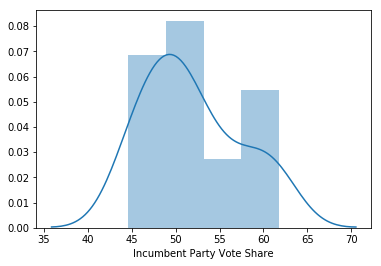

In [73]:
%matplotlib inline
import seaborn as sns
sns.distplot(df['Incumbent Party Vote Share'])

In [230]:
target = 'Incumbent Party Vote Share'

mean_baseline = [df[target].mean()] * len(df)
df['Mean Baseline'] = df[target].mean()
df['Error'] = df['Mean Baseline'] - df[target]
df

,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,Equipment,Intellectual property products,Residential,Change in private inventories,Net exports of goods and services,Exports,Goods,Services,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Addendum:,"Gross domestic product, current dollars",Mean Baseline,Error
1952,Stevenson,Eisenhower,44.60,4.1,3.2,2.3,-2.2,3.8,4.5,-8.2,-0.6,-0.1,-0.4,-2.9,24.8,-1.6,---,---,-4.3,-5.1,-0.3,8.8,2.0,30.4,19.8,28.4,30.7,12.3,1.6,NaN,5.9,51.828235,7.228235
1956,Eisenhower,Stevenson,57.76,2.1,2.9,1.5,-3.7,3.5,4.8,-0.3,1.4,6.8,10.5,2.6,16.6,-7.9,---,---,16.5,17.3,13.1,8.1,8.9,6.5,0.2,-1.3,-0.5,-6.7,3.2,NaN,5.6,51.828235,-5.931765
1960,Nixon,Kennedy,49.91,2.6,2.7,1.8,2.0,1.7,3.9,0.4,1.2,5.5,7.9,3.8,6.1,-6.8,---,---,17.4,23.4,1.6,1.3,-1.6,7.8,0.6,-1.6,-0.8,-5.9,4.3,NaN,4.0,51.828235,1.918235
1964,Johnson,Goldwater,61.34,5.8,6.0,6.0,9.3,4.7,5.9,7.9,9.1,10.7,10.4,12.6,4.5,6.0,---,---,11.8,13.9,5.5,5.3,6.6,2.6,2.4,-0.4,-3.1,10.4,6.7,NaN,7.4,51.828235,-9.511765
1968,Humphrey,Nixon,49.60,4.9,5.8,6.2,11.1,4.2,5.3,6.0,7.0,4.8,1.4,6.1,7.5,13.5,---,---,7.9,8.1,7.4,14.9,20.7,1.8,3.4,1.5,1.6,1.3,6.0,NaN,9.4,51.828235,2.228235
1972,Nixon,McGovern,61.79,5.3,6.1,6.5,12.4,4.0,5.7,11.3,11.4,8.7,3.1,12.7,7.0,17.4,---,---,7.8,10.9,-0.4,11.3,13.6,4.2,-0.5,-3.2,-6.9,7.2,2.2,NaN,9.8,51.828235,-9.961765
1976,Ford,Carter,48.95,5.4,5.6,7.0,12.5,4.8,4.3,19.1,9.8,5.7,2.4,6.1,10.8,22.1,---,---,4.4,5.1,1.1,19.6,22.6,6.9,0.5,0.1,-0.6,1.7,0.8,NaN,11.2,51.828235,2.878235
1980,Carter,Reagan,44.70,-0.3,-0.3,-2.5,-8.0,-0.2,1.6,-10.1,-5.9,0.0,5.9,-4.4,5.0,-20.9,---,---,10.8,12.3,4.2,-6.7,-7.4,-2.2,1.8,4.2,3.6,5.4,-0.2,NaN,8.8,51.828235,7.128235
1984,Reagan,Mondale,59.17,7.2,5.3,7.2,14.3,4.1,3.8,27.3,16.2,16.7,13.9,19.4,13.7,14.8,---,---,8.2,7.1,11.8,24.3,24.2,25.1,3.5,3.2,5.0,-1.4,3.9,NaN,11.1,51.828235,-7.341765
1988,"Bush, Sr.",Dukakis,53.94,4.2,4.2,3.7,5.7,2.6,4.5,2.5,3.3,5.0,0.7,6.6,7.1,-0.9,---,---,16.2,17.8,11.9,3.9,4.1,3.4,1.2,-1.5,-0.5,-4.3,3.8,NaN,7.9,51.828235,-2.111765


In [231]:
df['Absolute Error'] = df['Error'].abs()
df['Absolute Error'].mean()

4.463806228373703

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true=df['Incumbent Party Vote Share'],
                    y_pred=df['Mean Baseline'])

4.463806228373702

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
model = LinearRegression()

In [232]:
df.columns = df.columns.str.strip()
df.columns

Index(['Incumbent Party Candidate', 'Other Candidate', 'Incumbent Party Vote Share', 'Gross domestic product', 'Personal consumption expenditures', 'Goods', 'Durable goods', 'Nondurable goods', 'Services', 'Gross private domestic investment', 'Fixed investment', 'Nonresidential', 'Structures', 'Equipment', 'Intellectual property products', 'Residential', 'Change in private inventories', 'Net exports of goods and services', 'Exports', 'Goods', 'Services', 'Imports', 'Goods', 'Services', 'Government consumption expenditures and gross investment', 'Federal', 'National defense', 'Nondefense', 'State and local', 'Addendum:', 'Gross domestic product, current dollars', 'Mean Baseline', 'Error', 'Absolute Error'], dtype='object')

In [233]:
df = df.drop('Addendum:', axis=1)

In [234]:
df = df.drop(['Change in private inventories', 'Net exports of goods and services'], axis=1)

In [235]:
df.describe(include='all')

,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,Equipment,Intellectual property products,Residential,Exports,Goods,Services,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,"Gross domestic product, current dollars",Mean Baseline,Error,Absolute Error
count,17,17,17.000000,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,1.700000e+01,1.700000e+01,17.000000
unique,14,17,NaN,15,16,17,16,17,16,16,16,17,17,16,15,17,16,17,16,17,16,16,15,16,15,17,17,16,NaN,NaN,NaN
top,Clinton,Stevenson,NaN,4.1,2.7,7.2,5.7,1.9,4.5,-8.2,7.0,9.3,10.5,6.1,7.5,-0.9,8.2,7.5,11.9,24.3,9.4,4.2,1.8,-1.6,-0.5,-0.5,4.3,5.9,NaN,NaN,NaN
freq,2,1,NaN,2,2,1,2,1,2,2,2,1,1,2,2,1,2,1,2,1,2,2,2,2,2,1,1,2,NaN,NaN,NaN
mean,NaN,NaN,51.828235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.182824e+01,-8.359326e-16,4.463806
std,NaN,NaN,5.510739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.464821e-14,5.510739e+00,3.032709
min,NaN,NaN,44.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.182824e+01,-9.961765e+00,0.171765
25%,NaN,NaN,48.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.182824e+01,-2.911765e+00,2.111765
50%,NaN,NaN,50.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.182824e+01,1.558235e+00,3.628235
75%,NaN,NaN,54.740000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.182824e+01,3.628235e+00,7.128235


In [152]:
cols = ['Incumbent Party Vote Share', 'Gross domestic product', 'Personal consumption expenditures', 'Goods', 'Durable goods', 'Nondurable goods', 'Services', 'Gross private domestic investment', 'Fixed investment', 'Nonresidential', 'Structures', 'Equipment', 'Intellectual property products', 'Residential', 'Exports', 'Goods', 'Services', 'Imports', 'Goods', 'Services', 'Government consumption expenditures and gross investment', 'Federal', 'National defense', 'Nondefense', 'State and local', 'Mean Baseline', 'Error', 'Absolute Error']
for col in cols:
    df[col] = df[col].apply(pd.to_numeric)

In [214]:
nonfarm_payroll = pd.read_csv('non-farm-payroll-annual-change.csv', parse_dates=['DATE'])
nonfarm_payroll = nonfarm_payroll.drop(nonfarm_payroll.tail(1).index)

In [217]:
nonfarm_payroll = nonfarm_payroll.rename({"DATE": "Year", 'PAYEMS_PC1': 'pct_change'}, axis=1)

In [218]:
nonfarm_payroll['pct_change'] = pd.to_numeric(nonfarm_payroll['pct_change'])

In [219]:
years = nonfarm_payroll['Year'].apply(lambda d: d.year)
nonfarm_payroll = nonfarm_payroll.set_index(years)

In [221]:
nonfarm_payroll = nonfarm_payroll.drop('Year', axis=1)

In [222]:
nonfarm_payroll

,pct_change
Year,
1940,5.75960
1941,12.95788
1942,9.89281
1943,5.87279
1944,-1.35545
1945,-3.60001
1946,3.04500
1947,5.22840
1948,2.31050


In [243]:
temp_df = df.copy()

In [247]:
election_year_payroll = nonfarm_payroll.loc[votes.index.values]
df = pd.concat([df, election_year_payroll], axis=1, join='outer')

In [248]:
df

,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,Equipment,Intellectual property products,Residential,Exports,Goods,Services,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,"Gross domestic product, current dollars",Mean Baseline,Error,Absolute Error,pct_change
1952,Stevenson,Eisenhower,44.60,4.1,3.2,2.3,-2.2,3.8,4.5,-8.2,-0.6,-0.1,-0.4,-2.9,24.8,-1.6,-4.3,-5.1,-0.3,8.8,2.0,30.4,19.8,28.4,30.7,12.3,1.6,5.9,51.828235,7.228235,7.228235,2.03840
1956,Eisenhower,Stevenson,57.76,2.1,2.9,1.5,-3.7,3.5,4.8,-0.3,1.4,6.8,10.5,2.6,16.6,-7.9,16.5,17.3,13.1,8.1,8.9,6.5,0.2,-1.3,-0.5,-6.7,3.2,5.6,51.828235,-5.931765,5.931765,3.41271
1960,Nixon,Kennedy,49.91,2.6,2.7,1.8,2.0,1.7,3.9,0.4,1.2,5.5,7.9,3.8,6.1,-6.8,17.4,23.4,1.6,1.3,-1.6,7.8,0.6,-1.6,-0.8,-5.9,4.3,4.0,51.828235,1.918235,1.918235,1.72702
1964,Johnson,Goldwater,61.34,5.8,6.0,6.0,9.3,4.7,5.9,7.9,9.1,10.7,10.4,12.6,4.5,6.0,11.8,13.9,5.5,5.3,6.6,2.6,2.4,-0.4,-3.1,10.4,6.7,7.4,51.828235,-9.511765,9.511765,2.86729
1968,Humphrey,Nixon,49.60,4.9,5.8,6.2,11.1,4.2,5.3,6.0,7.0,4.8,1.4,6.1,7.5,13.5,7.9,8.1,7.4,14.9,20.7,1.8,3.4,1.5,1.6,1.3,6.0,9.4,51.828235,2.228235,2.228235,3.17166
1972,Nixon,McGovern,61.79,5.3,6.1,6.5,12.4,4.0,5.7,11.3,11.4,8.7,3.1,12.7,7.0,17.4,7.8,10.9,-0.4,11.3,13.6,4.2,-0.5,-3.2,-6.9,7.2,2.2,9.8,51.828235,-9.961765,9.961765,3.44428
1976,Ford,Carter,48.95,5.4,5.6,7.0,12.5,4.8,4.3,19.1,9.8,5.7,2.4,6.1,10.8,22.1,4.4,5.1,1.1,19.6,22.6,6.9,0.5,0.1,-0.6,1.7,0.8,11.2,51.828235,2.878235,2.878235,3.16070
1980,Carter,Reagan,44.70,-0.3,-0.3,-2.5,-8.0,-0.2,1.6,-10.1,-5.9,0.0,5.9,-4.4,5.0,-20.9,10.8,12.3,4.2,-6.7,-7.4,-2.2,1.8,4.2,3.6,5.4,-0.2,8.8,51.828235,7.128235,7.128235,0.66279
1984,Reagan,Mondale,59.17,7.2,5.3,7.2,14.3,4.1,3.8,27.3,16.2,16.7,13.9,19.4,13.7,14.8,8.2,7.1,11.8,24.3,24.2,25.1,3.5,3.2,5.0,-1.4,3.9,11.1,51.828235,-7.341765,7.341765,4.71146
1988,"Bush, Sr.",Dukakis,53.94,4.2,4.2,3.7,5.7,2.6,4.5,2.5,3.3,5.0,0.7,6.6,7.1,-0.9,16.2,17.8,11.9,3.9,4.1,3.4,1.2,-1.5,-0.5,-4.3,3.8,7.9,51.828235,-2.111765,2.111765,3.19339


In [251]:
features = ['Gross domestic product', 'pct_change', 'Nondefense', 'Goods', 'Durable goods', 'Nondurable goods', 'Equipment']
target = 'Incumbent Party Vote Share'
X = df[features]
y = df[target]
model.fit(X, y)
y_pred = model.predict(X)
df['linReg, 6 features'] = y_pred
mean_absolute_error(y, y_pred)

1.679969275129757

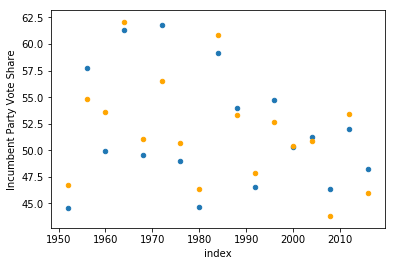

In [163]:
import matplotlib.pyplot as plt

ax = df.reset_index().plot(x='index', 
             y='Incumbent Party Vote Share', 
             kind='scatter')

df.reset_index().plot(x='index', 
        y='linReg, 6 features', 
        kind='scatter', 
        color='orange', 
        ax=ax);
ax.set_ylabel('Incumbent Party Vote Share')
plt.show()

In [94]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
df

,Incumbent Party Candidate,Other Candidate,Incumbent Party Vote Share,Gross domestic product,Personal consumption expenditures,Goods,Durable goods,Nondurable goods,Services,Gross private domestic investment,Fixed investment,Nonresidential,Structures,Equipment,Intellectual property products,Residential,Change in private inventories,Net exports of goods and services,Exports,Goods,Services,Imports,Goods,Services,Government consumption expenditures and gross investment,Federal,National defense,Nondefense,State and local,Addendum:,"Gross domestic product, current dollars",Mean Baseline,Error,Absolute Error
1952,Stevenson,Eisenhower,44.60,4.1,3.2,2.3,-2.2,3.8,4.5,-8.2,-0.6,-0.1,-0.4,-2.9,24.8,-1.6,---,---,-4.3,-5.1,-0.3,8.8,2.0,30.4,19.8,28.4,30.7,12.3,1.6,NaN,5.9,51.828235,7.228235,7.228235
1956,Eisenhower,Stevenson,57.76,2.1,2.9,1.5,-3.7,3.5,4.8,-0.3,1.4,6.8,10.5,2.6,16.6,-7.9,---,---,16.5,17.3,13.1,8.1,8.9,6.5,0.2,-1.3,-0.5,-6.7,3.2,NaN,5.6,51.828235,-5.931765,5.931765
1960,Nixon,Kennedy,49.91,2.6,2.7,1.8,2.0,1.7,3.9,0.4,1.2,5.5,7.9,3.8,6.1,-6.8,---,---,17.4,23.4,1.6,1.3,-1.6,7.8,0.6,-1.6,-0.8,-5.9,4.3,NaN,4.0,51.828235,1.918235,1.918235
1964,Johnson,Goldwater,61.34,5.8,6.0,6.0,9.3,4.7,5.9,7.9,9.1,10.7,10.4,12.6,4.5,6.0,---,---,11.8,13.9,5.5,5.3,6.6,2.6,2.4,-0.4,-3.1,10.4,6.7,NaN,7.4,51.828235,-9.511765,9.511765
1968,Humphrey,Nixon,49.60,4.9,5.8,6.2,11.1,4.2,5.3,6.0,7.0,4.8,1.4,6.1,7.5,13.5,---,---,7.9,8.1,7.4,14.9,20.7,1.8,3.4,1.5,1.6,1.3,6.0,NaN,9.4,51.828235,2.228235,2.228235
1972,Nixon,McGovern,61.79,5.3,6.1,6.5,12.4,4.0,5.7,11.3,11.4,8.7,3.1,12.7,7.0,17.4,---,---,7.8,10.9,-0.4,11.3,13.6,4.2,-0.5,-3.2,-6.9,7.2,2.2,NaN,9.8,51.828235,-9.961765,9.961765
1976,Ford,Carter,48.95,5.4,5.6,7.0,12.5,4.8,4.3,19.1,9.8,5.7,2.4,6.1,10.8,22.1,---,---,4.4,5.1,1.1,19.6,22.6,6.9,0.5,0.1,-0.6,1.7,0.8,NaN,11.2,51.828235,2.878235,2.878235
1980,Carter,Reagan,44.70,-0.3,-0.3,-2.5,-8.0,-0.2,1.6,-10.1,-5.9,0.0,5.9,-4.4,5.0,-20.9,---,---,10.8,12.3,4.2,-6.7,-7.4,-2.2,1.8,4.2,3.6,5.4,-0.2,NaN,8.8,51.828235,7.128235,7.128235
1984,Reagan,Mondale,59.17,7.2,5.3,7.2,14.3,4.1,3.8,27.3,16.2,16.7,13.9,19.4,13.7,14.8,---,---,8.2,7.1,11.8,24.3,24.2,25.1,3.5,3.2,5.0,-1.4,3.9,NaN,11.1,51.828235,-7.341765,7.341765
1988,"Bush, Sr.",Dukakis,53.94,4.2,4.2,3.7,5.7,2.6,4.5,2.5,3.3,5.0,0.7,6.6,7.1,-0.9,---,---,16.2,17.8,11.9,3.9,4.1,3.4,1.2,-1.5,-0.5,-4.3,3.8,NaN,7.9,51.828235,-2.111765,2.111765
